<a href="https://colab.research.google.com/github/VivoSorhie/Sephora-Reviews-Sentiment-Analysis/blob/main/Sephora_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sephora Reviews

In [ ]:
#Loading and Combining Multiple Files ---

import pandas as pd
import numpy as np
import io
from google.colab import files

print("Please select all 6 of your dataset files for upload.")
uploaded = files.upload()



Please select all 6 of your dataset files for upload.


Saving product_info.csv to product_info.csv
Saving reviews_0-250.csv to reviews_0-250.csv
Saving reviews_250-500.csv to reviews_250-500.csv
Saving reviews_500-750.csv to reviews_500-750.csv
Saving reviews_750-1250.csv to reviews_750-1250.csv
Saving reviews_1250-end.csv to reviews_1250-end.csv


In [ ]:
# Create a list of all the review filenames you uploaded
review_files = [
    'reviews_0-250.csv',
    'reviews_250-500.csv',
    'reviews_500-750.csv',
    'reviews_750-1250.csv',
    'reviews_1250-end.csv'
]

# Read each CSV file into a DataFrame and store them in a list
list_of_dfs = [pd.read_csv(io.StringIO(uploaded[file].decode('utf-8'))) for file in review_files]

# Concatenate all DataFrames in the list into one
reviews_df = pd.concat(list_of_dfs, ignore_index=True)

print("Successfully combined all review files.")
print(f"The combined reviews DataFrame has {reviews_df.shape[0]:,} rows and {reviews_df.shape[1]} columns.")

/tmp/ipython-input-2240057319.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_dfs = [pd.read_csv(io.StringIO(uploaded[file].decode('utf-8'))) for file in review_files]
/tmp/ipython-input-2240057319.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_dfs = [pd.read_csv(io.StringIO(uploaded[file].decode('utf-8'))) for file in review_files]


Successfully combined all review files.
The combined reviews DataFrame has 1,094,411 rows and 19 columns.


/tmp/ipython-input-2240057319.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_dfs = [pd.read_csv(io.StringIO(uploaded[file].decode('utf-8'))) for file in review_files]


In [ ]:
# Load the product_info.csv file
product_df = pd.read_csv(io.StringIO(uploaded['product_info.csv'].decode('utf-8')))
print(f"\nThe product info DataFrame has {product_df.shape[0]:,} rows and {product_df.shape[1]} columns.")

# --- MERGE THE DATAFRAMES ---
common_column = 'product_id'

# Perform a 'left' merge to keep all reviews and add product info where available
df = pd.merge(reviews_df, product_df, on=common_column, how='left')

print(f"\nSuccessfully merged reviews with product information.")
print(f"The final, complete DataFrame has {df.shape[0]:,} rows and {df.shape[1]} columns.")

# Display the first 5 rows and the column names of the final DataFrame
print("\nHere's a preview of the final dataset:")
print(df.head())
print("\nColumns in the final DataFrame:")
print(df.columns.tolist())


The product info DataFrame has 8,494 rows and 27 columns.

Successfully merged reviews with product information.
The final, complete DataFrame has 1,094,411 rows and 45 columns.

Here's a preview of the final dataset:
   Unnamed: 0    author_id  rating_x  is_recommended  helpfulness  \
0           0   1741593524         5             1.0          1.0   
1           1  31423088263         1             0.0          NaN   
2           2   5061282401         5             1.0          NaN   
3           3   6083038851         5             1.0          NaN   
4           4  47056667835         5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0 

In [ ]:
import pandas as pd
import glob
import os

# --- Product Dataframe Creation ---
# Define the path to the product information file
product_file = 'product_info.csv'
print(f"Attempting to load {product_file}...")

# Check if the file exists before trying to read it
if os.path.exists(product_file):
    df_products = pd.read_csv(product_file)
    print("Product data loaded.")
    print(f"Product DataFrame shape: {df_products.shape}")
else:
    print(f"\n Critical Error: '{product_file}' was not found in the current directory.")

# --- Reviews Dataframe Creation ---
# Use glob to dynamically find all files that start with 'reviews_' and end with '.csv'
review_filenames = sorted(glob.glob('reviews_*.csv'))

if review_filenames:
    print(f"\nFound {len(review_filenames)} review files to be combined: {review_filenames}")

    # Generate a list of DataFrames by reading each review CSV from the file path
    list_of_review_dfs = [pd.read_csv(file) for file in review_filenames]

    # Concatenate the list of DataFrames into a single master reviews table
    df_reviews = pd.concat(list_of_review_dfs, ignore_index=True)

    print("All review files successfully combined into a single DataFrame.")
    print(f"Combined Reviews DataFrame shape: {df_reviews.shape}")

    # Display the head of the combined reviews to verify integrity
    print("\n--- Verifying Combined Reviews Data ---")
    display(df_reviews.head())
else:
    print("\nCritical Error: No review files matching 'reviews_*.csv' were found.")

Attempting to load product_info.csv...
✅ Product data loaded.
Product DataFrame shape: (8494, 27)

Found 5 review files to be combined: ['reviews_0-250.csv', 'reviews_1250-end.csv', 'reviews_250-500.csv', 'reviews_500-750.csv', 'reviews_750-1250.csv']


/tmp/ipython-input-2931236584.py:26: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_review_dfs = [pd.read_csv(file) for file in review_filenames]
/tmp/ipython-input-2931236584.py:26: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_review_dfs = [pd.read_csv(file) for file in review_filenames]
/tmp/ipython-input-2931236584.py:26: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_review_dfs = [pd.read_csv(file) for file in review_filenames]


✅ All review files successfully combined into a single DataFrame.
Combined Reviews DataFrame shape: (1094411, 19)

--- Verifying Combined Reviews Data ---


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
# --- Section 2.1 : Prepare the Base DataFrame ---

# Start with df_reviews since it contains most of what we need.
df_final = df_reviews.copy()

# Rename the 'rating' column to avoid confusion with the product's average rating.
df_final.rename(columns={'rating': 'rating_review'}, inplace=True)

# Drop rows where review text or rating is missing, as they are essential.
df_final.dropna(subset=['review_text', 'rating_review'], inplace=True)
print("Base DataFrame prepared from df_reviews.")


# --- Section 2.2 (Final): Strategic Merge for Additional Data ---

# We only need a few extra columns from df_products. Let's grab them.
product_categories = df_products[['product_id', 'primary_category']].copy()

# Ensure product_id is the same data type before merging.
df_final['product_id'] = df_final['product_id'].astype(str)
product_categories['product_id'] = product_categories['product_id'].astype(str)

# Merge ONLY the needed columns to avoid name conflicts.
df_final = pd.merge(df_final, product_categories, on='product_id', how='left')
print("Strategically merged additional product data (e.g., category).")


# --- Section 2.3 (Final): Final Feature Selection ---

# Select all the columns we need for our analysis.
# All these names are now correct and will be found.
relevant_columns = [
    'product_name', 'brand_name', 'primary_category',
    'review_title', 'review_text',
    'rating_review', 'is_recommended',
    'helpfulness', 'price_usd',
    'skin_type', 'skin_tone', 'eye_color', 'hair_color'
]

# Filter for columns that actually exist to be safe.
existing_columns = [col for col in relevant_columns if col in df_final.columns]
df_final = df_final[existing_columns]

print(f"\nFinal DataFrame created with {len(existing_columns)} columns.")

print("\n--- Final DataFrame Info ---")
df_final.info()

print("\n--- Final DataFrame Head ---")
display(df_final.head())

✅ Base DataFrame prepared from df_reviews.
✅ Strategically merged additional product data (e.g., category).

✅ Final DataFrame created with 13 columns.

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092967 entries, 0 to 1092966
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   product_name      1092967 non-null  object 
 1   brand_name        1092967 non-null  object 
 2   primary_category  1092967 non-null  object 
 3   review_title      783757 non-null   object 
 4   review_text       1092967 non-null  object 
 5   rating_review     1092967 non-null  int64  
 6   is_recommended    924979 non-null   float64
 7   helpfulness       532372 non-null   float64
 8   price_usd         1092967 non-null  float64
 9   skin_type         981449 non-null   object 
 10  skin_tone         922468 non-null   object 
 11  eye_color         883401 non-null   object 
 12  hair_color    

,product_name,brand_name,primary_category,review_title,review_text,rating_review,is_recommended,helpfulness,price_usd,skin_type,skin_tone,eye_color,hair_color
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,Skincare,Taught me how to double cleanse!,I use this with the Nudestix “Citrus Clean Bal...,5,1.0,1.0,19.0,dry,NaN,brown,black
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Skincare,Disappointed,I bought this lip mask after reading the revie...,1,0.0,NaN,24.0,NaN,NaN,NaN,NaN
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Skincare,New Favorite Routine,My review title says it all! I get so excited ...,5,1.0,NaN,24.0,dry,light,brown,blonde
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Skincare,Can't go wrong with any of them,I’ve always loved this formula for a long time...,5,1.0,NaN,24.0,combination,NaN,brown,black
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Skincare,A must have !!!,"If you have dry cracked lips, this is a must h...",5,1.0,NaN,24.0,combination,light,hazel,NaN


In [ ]:
print(df_sample.columns.tolist())

['Unnamed: 0', 'author_id', 'rating_x', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name_x', 'brand_name_x', 'price_usd_x', 'product_name_y', 'brand_id', 'brand_name_y', 'loves_count', 'rating_y', 'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'price_usd_y', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price', 'sentiment', 'cleaned_review']


In [ ]:
# --- 2.1 Ensure the Sample DataFrame Exists ---
# df_sample has already been created from the original data.
print(f"Working with 'df_sample' containing {len(df_sample):,} rows.")
print("-" * 50)


# --- 2.2 Define Sentiment Labels (Feature Engineering) ---

# !!! CORRECTED: Updated the rating_column to 'rating_x' !!!
review_column = 'review_text'
rating_column = 'rating_x'  # <-- THIS WAS THE FIX

# Check for and drop any missing values in these essential columns.
print(f"Missing values in '{review_column}': {df_sample[review_column].isnull().sum()}")
print(f"Missing values in '{rating_column}': {df_sample[rating_column].isnull().sum()}")
df_sample.dropna(subset=[review_column, rating_column], inplace=True)

# Define our sentiment classification rules based on star rating.
def assign_sentiment(rating):
    rating = int(rating)
    if rating >= 4:
        return 1  # Positive sentiment
    elif rating <= 2:
        return 0  # Negative sentiment
    else:
        return None # Neutral sentiment (will be excluded)

df_sample['sentiment'] = df_sample[rating_column].apply(assign_sentiment)

# Remove the neutral (3-star) reviews.
initial_rows = len(df_sample)
df_sample.dropna(subset=['sentiment'], inplace=True)
rows_removed = initial_rows - len(df_sample)
print(f"\nRemoved {rows_removed} neutral (3-star) reviews.")

# Ensure the 'sentiment' column is an integer type.
df_sample['sentiment'] = df_sample['sentiment'].astype(int)

print("\nSentiment distribution in our final sample:")
print(df_sample['sentiment'].value_counts())
print("\nFinal sample is ready for text cleaning. Here's a preview:")
print(df_sample[[review_column, rating_column, 'sentiment']].head())

Working with 'df_sample' containing 92,460 rows.
--------------------------------------------------
Missing values in 'review_text': 0
Missing values in 'rating_x': 0

Removed 0 neutral (3-star) reviews.

Sentiment distribution in our final sample:
sentiment
1    81991
0    10469
Name: count, dtype: int64

Final sample is ready for text cleaning. Here's a preview:
                                               review_text  rating_x  \
1049894  I have used 2 bottles of this product and it d...         1   
619554   I love this product, I feel like it really cal...         5   
634782   Lately I’ve been loving my skin and this toner...         5   
706815   This toner is one of the best purchases I have...         5   
731656   I have been loving all the products so far the...         5   

         sentiment  
1049894          0  
619554           1  
634782           1  
706815           1  
731656           1  


In [ ]:
print(df_sample.shape)

(92460, 46)


In [ ]:
### 3. Text Preprocessing and Cleaning

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm

# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize our tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Use tqdm's progress_apply to see a progress bar
tqdm.pandas(desc="Cleaning Reviews")

def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    # 2. Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # 3. Tokenize text (split into words)
    words = text.split()
    # 4. Remove stopwords and perform lemmatization
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # 5. Join words back into a single string
    return " ".join(cleaned_words)

# Apply the cleaning function to create the 'cleaned_review' column
df_sample['cleaned_review'] = df_sample['review_text'].progress_apply(preprocess_text)

print("\nText cleaning complete!")
print("Here is a 'before and after' comparison for a few reviews:")
print(df_sample[['review_text', 'cleaned_review']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Cleaning Reviews:   0%|          | 0/92460 [00:00<?, ?it/s]


Text cleaning complete!
Here is a 'before and after' comparison for a few reviews:
                                               review_text  \
1049894  I have used 2 bottles of this product and it d...   
619554   I love this product, I feel like it really cal...   
634782   Lately I’ve been loving my skin and this toner...   
706815   This toner is one of the best purchases I have...   
731656   I have been loving all the products so far the...   

                                            cleaned_review  
1049894  used bottle product absolutely nothing waste m...  
619554   love product feel like really calm redness ski...  
634782   lately ive loving skin toner came right time r...  
706815   toner one best purchase ever made oily acnepro...  
731656   loving product far make face feel amazinggggg ...  


Training data shape: (73968,)
Test data shape: (18492,)
--------------------------------------------------
Text vectorization complete.
Shape of TF-IDF matrices: Train (73968, 10000), Test (18492, 10000)
--------------------------------------------------
Baseline model training complete.
--------------------------------------------------
Classification Report for Baseline Model:
              precision    recall  f1-score   support

Negative (0)       0.58      0.90      0.70      2094
Positive (1)       0.99      0.92      0.95     16398

    accuracy                           0.91     18492
   macro avg       0.78      0.91      0.83     18492
weighted avg       0.94      0.91      0.92     18492

Confusion Matrix:


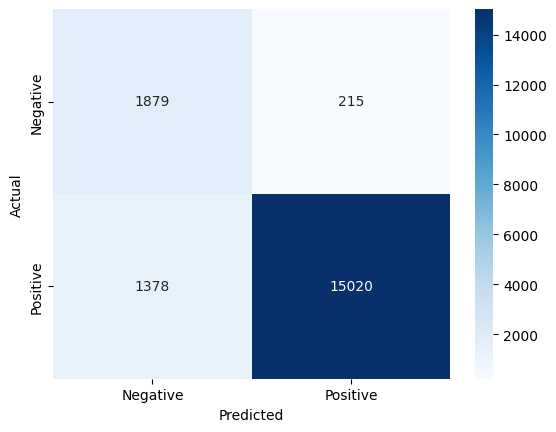

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- 4.1 Split the Data ---

# We'll use our 'cleaned_review' as the feature (X) and 'sentiment' as the target (y)
X = df_sample['cleaned_review']
y = df_sample['sentiment']

# Split the data into 80% for training and 20% for testing
# stratify=y ensures that the proportion of positive/negative reviews is the same in both train and test sets,
# which is crucial for our imbalanced dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print("-" * 50)


# --- 4.2 Vectorize the Text ---

# Initialize the TF-IDF Vectorizer
# It will learn the vocabulary only from the training data to prevent data leakage
tfidf_vectorizer = TfidfVectorizer(max_features=10000) # Limit to the top 10,000 most frequent words

# Fit on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Only transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Text vectorization complete.")
print(f"Shape of TF-IDF matrices: Train {X_train_tfidf.shape}, Test {X_test_tfidf.shape}")
print("-" * 50)


# --- 4.3 Train the Logistic Regression Model ---

# Initialize and train the model
# class_weight='balanced' is a crucial parameter for our imbalanced dataset.
# It automatically adjusts weights to give more importance to the minority class (negative reviews).
baseline_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
baseline_model.fit(X_train_tfidf, y_train)

print("Baseline model training complete.")
print("-" * 50)


# --- 4.4 Evaluate the Baseline Model ---

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test_tfidf)

# Print the classification report
print("Classification Report for Baseline Model:")
print(classification_report(y_test, y_pred_baseline, target_names=['Negative (0)', 'Positive (1)']))

# Display the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Map:   0%|          | 0/73968 [00:00<?, ? examples/s]

Map:   0%|          | 0/18492 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,0.083700,0.062460


Evaluating the model on the test set...



Classification Report for DistilBERT Model:
              precision    recall  f1-score   support

Negative (0)       0.93      0.90      0.92      2094
Positive (1)       0.99      0.99      0.99     16398

    accuracy                           0.98     18492
   macro avg       0.96      0.95      0.95     18492
weighted avg       0.98      0.98      0.98     18492

Confusion Matrix:


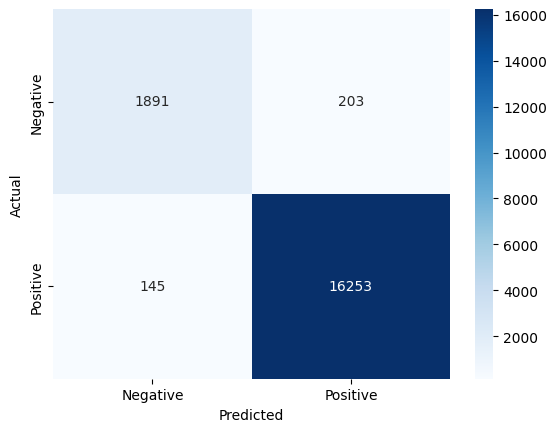

In [ ]:
### 5. Advanced Model: Fine-Tuning DistilBERT

# --- Add these lines to disable wandb ---
import os
os.environ["WANDB_DISABLED"] = "true"
# ---------------------------------------------

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from datasets import Dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the prepared df_sample from previous steps
X = df_sample['review_text']
y = df_sample['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create pandas DataFrames from the splits
train_df = pd.DataFrame({'text': X_train.tolist(), 'label': y_train.tolist()})
test_df = pd.DataFrame({'text': X_test.tolist(), 'label': y_test.tolist()})

# Convert pandas DataFrames to Hugging Face Dataset objects
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=256)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
)

# With wandb disabled, this will now start the training process directly.
trainer.train()

print("Evaluating the model on the test set...")
predictions = trainer.predict(tokenized_test_dataset)
y_pred_distilbert = np.argmax(predictions.predictions, axis=1)

print("\nClassification Report for DistilBERT Model:")
print(classification_report(y_test, y_pred_distilbert, target_names=['Negative (0)', 'Positive (1)']))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_distilbert)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pandas as pd

# The trainer object holds the history of our training run
log_history = trainer.state.log_history

# Separate the training and validation logs
train_logs = [log for log in log_history if 'loss' in log]
eval_logs = [log for log in log_history if 'eval_loss' in log]

# Create a DataFrame for easier analysis
loss_df = pd.DataFrame()

# Since we trained for 1 epoch, we'll have multiple training steps and one final eval step.
# For a multi-epoch run, this would populate with more data.
loss_df['step'] = [log['step'] for log in train_logs]
loss_df['train_loss'] = [log['loss'] for log in train_logs]

# Add the evaluation loss at the end
# We'll forward-fill the eval loss to see it aligned with the final training steps
eval_step = eval_logs[0]['step']
eval_loss = eval_logs[0]['eval_loss']
loss_df['eval_loss'] = None # Initialize column
loss_df.loc[loss_df['step'] >= eval_step, 'eval_loss'] = eval_loss

print("Training and Validation Loss History:")
print(loss_df)

# --- Analysis of the Final Losses ---
final_train_loss = loss_df['train_loss'].iloc[-1]
final_eval_loss = eval_logs[0]['eval_loss']

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_eval_loss:.4f}")

Training and Validation Loss History:
    step  train_loss eval_loss
0    100      0.4805      None
1    200      0.2326      None
2    300      0.1475      None
3    400      0.1659      None
4    500      0.1393      None
5    600      0.1587      None
6    700      0.1188      None
7    800      0.1381      None
8    900      0.1133      None
9   1000      0.1259      None
10  1100      0.0964      None
11  1200      0.1074      None
12  1300      0.1204      None
13  1400      0.0810      None
14  1500      0.0947      None
15  1600      0.1111      None
16  1700      0.1028      None
17  1800      0.0858      None
18  1900      0.0827      None
19  2000      0.1116      None
20  2100      0.0674      None
21  2200      0.0868      None
22  2300      0.0687      None
23  2400      0.0837      None
24  2500      0.0854      None
25  2600      0.0733      None
26  2700      0.0892      None
27  2800      0.0708      None
28  2900      0.0786      None
29  3000      0.0678      None
3

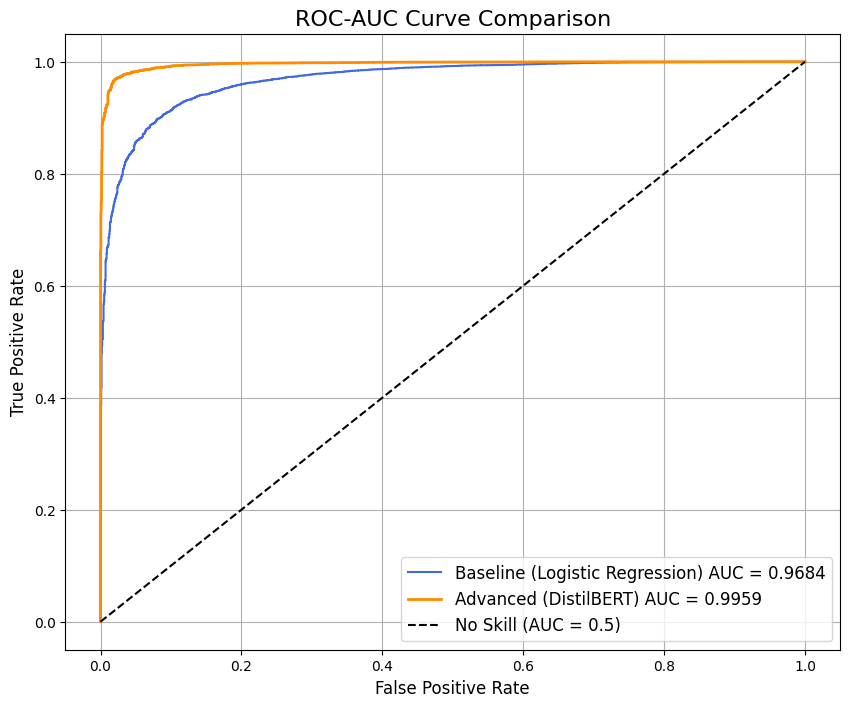

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax

# --- 1. Get Probabilities for Baseline Model ---
# We need the probability of the positive class (sentiment=1)
y_pred_probs_baseline = baseline_model.predict_proba(X_test_tfidf)[:, 1]

# --- 2. Get Probabilities for DistilBERT Model ---
# The raw output of trainer.predict() are logits. We need to convert them to probabilities.
logits = predictions.predictions
y_pred_probs_distilbert = softmax(logits, axis=1)[:, 1]

# --- 3. Calculate ROC Curve and AUC for Both Models ---
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_pred_probs_baseline)
auc_baseline = roc_auc_score(y_test, y_pred_probs_baseline)

fpr_distilbert, tpr_distilbert, _ = roc_curve(y_test, y_pred_probs_distilbert)
auc_distilbert = roc_auc_score(y_test, y_pred_probs_distilbert)

# --- 4. Plot the Curves ---
plt.figure(figsize=(10, 8))

# Plot Baseline Model
plt.plot(fpr_baseline, tpr_baseline, label=f'Baseline (Logistic Regression) AUC = {auc_baseline:.4f}', color='royalblue')

# Plot DistilBERT Model
plt.plot(fpr_distilbert, tpr_distilbert, label=f'Advanced (DistilBERT) AUC = {auc_distilbert:.4f}', color='darkorange', linewidth=2)

# Plot the "No-Skill" line (a random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.5)')

# --- Formatting ---
plt.title('ROC-AUC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

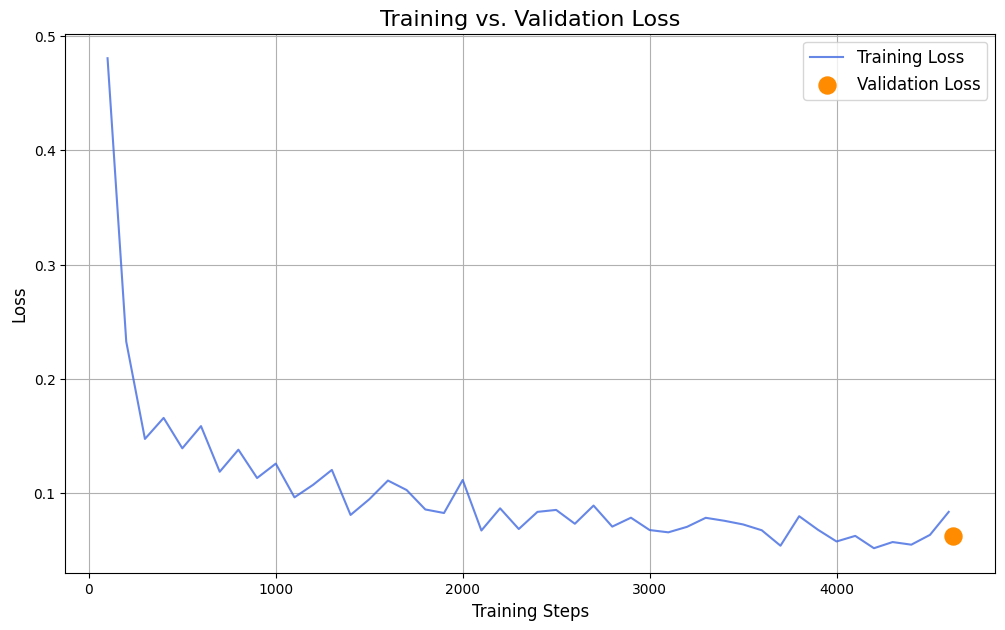

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Prepare the Data ---
# We use the log_history from the trainer object which we already extracted
# log_history = trainer.state.log_history

# Separate the training and validation logs
train_logs = [log for log in log_history if 'loss' in log]
eval_logs = [log for log in log_history if 'eval_loss' in log]

# Create a DataFrame for plotting
df_train = pd.DataFrame(train_logs)
df_eval = pd.DataFrame(eval_logs)


# --- 2. Create the Plot ---
plt.figure(figsize=(12, 7))

# Plot training loss
plt.plot(df_train['step'], df_train['loss'], label='Training Loss', color='royalblue', alpha=0.8)

# Plot validation loss
# We'll use a scatter plot with a larger marker since we only have one eval point
plt.scatter(df_eval['step'], df_eval['eval_loss'], label='Validation Loss', color='darkorange', s=150, zorder=5) # zorder makes it appear on top

# --- 3. Formatting ---
plt.title('Training vs. Validation Loss', fontsize=16)
plt.xlabel('Training Steps', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 6. Visual EDA and Business Insights

###**Most Reviewed Brands**



--- Chart 1: Top 10 Most Reviewed Brands ---


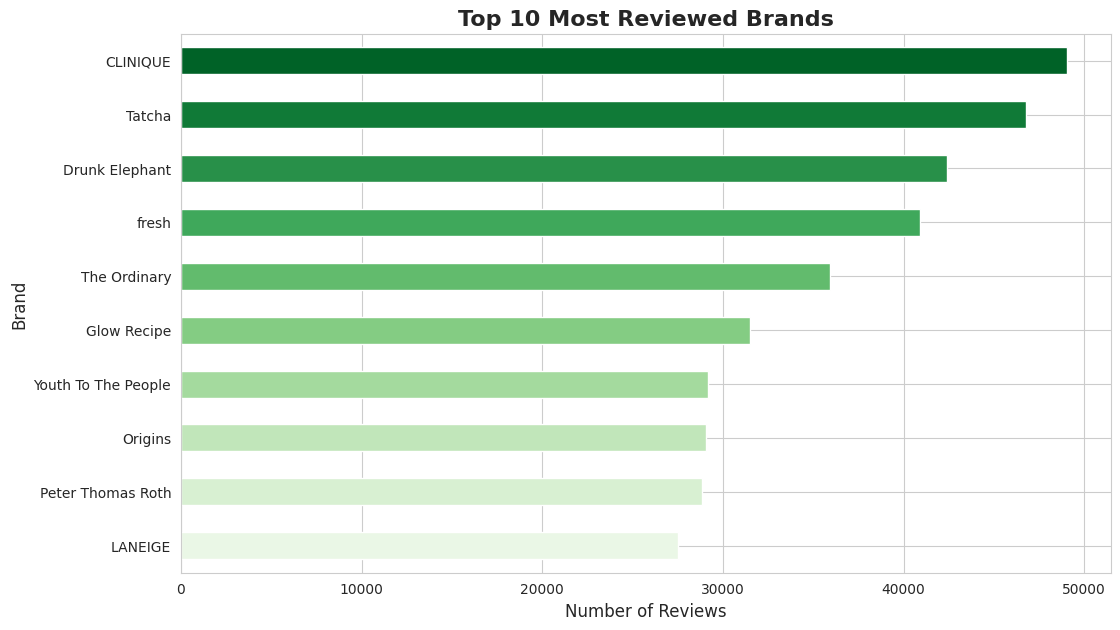

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style and figure size for our charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# --- Top 10 Most Reviewed Brands ---
print("--- Chart 1: Top 10 Most Reviewed Brands ---")
top_brands = df_original['brand_name_x'].value_counts().nlargest(10)

plt.figure()
# Switched to the "Greens" sequential palette for a fresh green gradient
top_brands.sort_values().plot(kind='barh', color=sns.color_palette("Greens", 10))
plt.title('Top 10 Most Reviewed Brands', fontsize=16, weight='bold')
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.show()

###**6.2 Most Reviewed Products**





--- Chart 2: Top 10 Most Reviewed Products ---


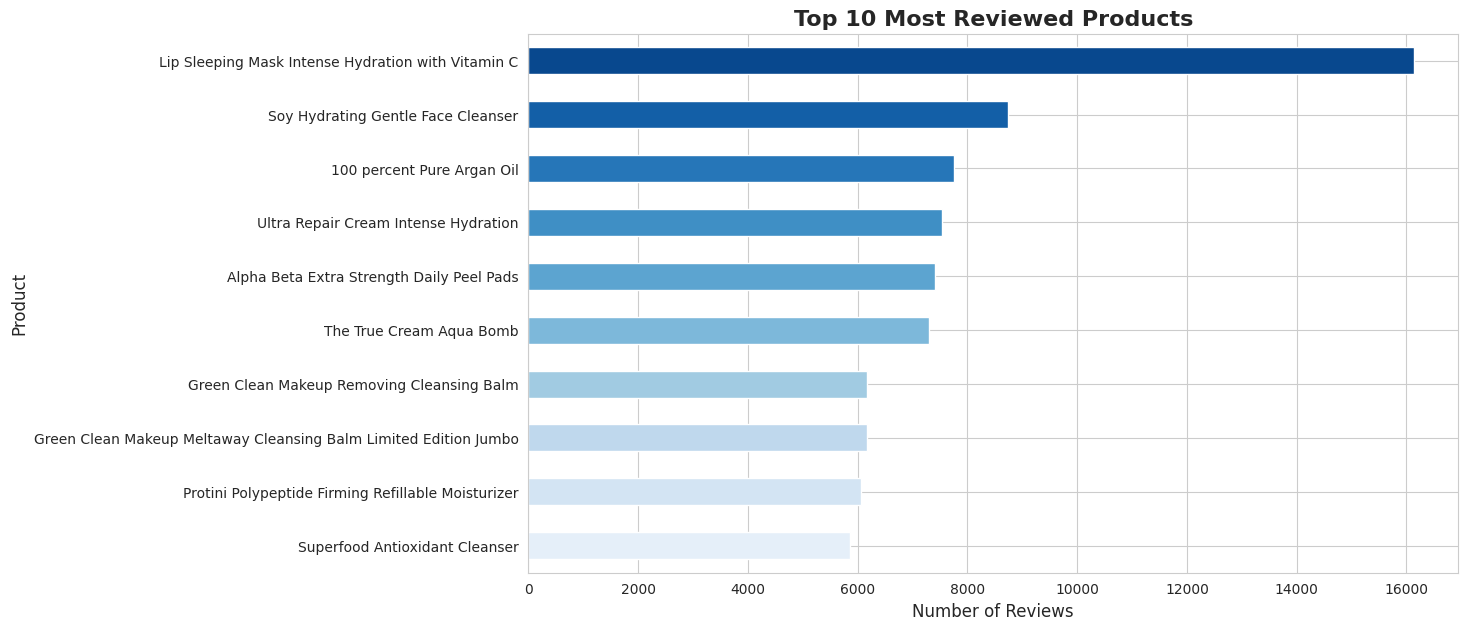

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style and figure size for our charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# --- Top 10 Most Reviewed Products ---
print("--- Chart 2: Top 10 Most Reviewed Products ---")
top_products = df_original['product_name_x'].value_counts().nlargest(10)

plt.figure()
# Switched to the "Blues" sequential palette to reverse the gradient
top_products.sort_values().plot(kind='barh', color=sns.color_palette("Blues", 10))
plt.title('Top 10 Most Reviewed Products', fontsize=16, weight='bold')
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

### **6.3 Top 10 Highest Rated Brands**

--- Chart 3: Top 10 Highest Rated Brands ---


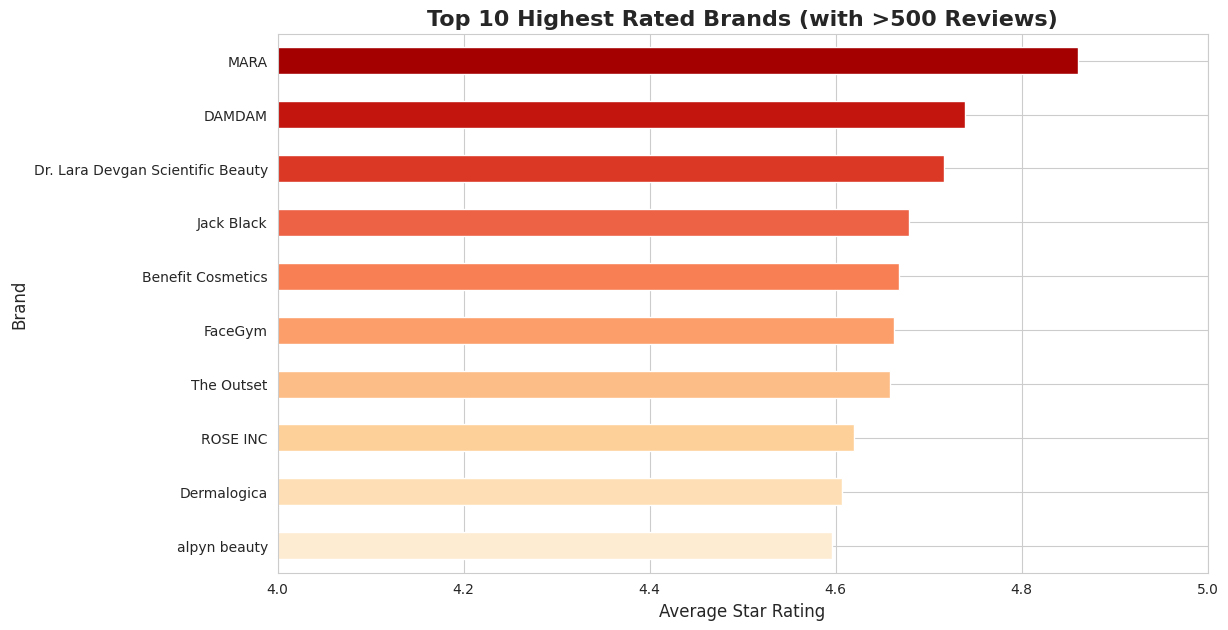

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style and figure size for our charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# --- Top 10 Highest Rated Brands (with >500 Reviews) ---
print("--- Chart 3: Top 10 Highest Rated Brands ---")

# Group by brand and calculate mean rating and review count
brand_performance = df_original.groupby('brand_name_x')['rating_x'].agg(['mean', 'count'])

# Filter out brands with a small number of reviews to get a fair comparison
popular_brands_performance = brand_performance[brand_performance['count'] >= 500].sort_values(by='mean', ascending=False)

# Get the top 10 highest-rated brands
top_rated = popular_brands_performance.nlargest(10, 'mean')

plt.figure()
# Using the "OrRd" sequential palette for a warm gradient
top_rated['mean'].sort_values().plot(kind='barh', color=sns.color_palette("OrRd", 10))
plt.title('Top 10 Highest Rated Brands (with >500 Reviews)', fontsize=16, weight='bold')
plt.xlabel('Average Star Rating', fontsize=12)
plt.ylabel('Brand', fontsize=12)
# Set x-axis limit to better visualize differences between high ratings
plt.xlim(4.0, 5.0)
plt.show()

### **6.4 Product Price Distribution**

--- Chart 4: Product Price Distribution ---


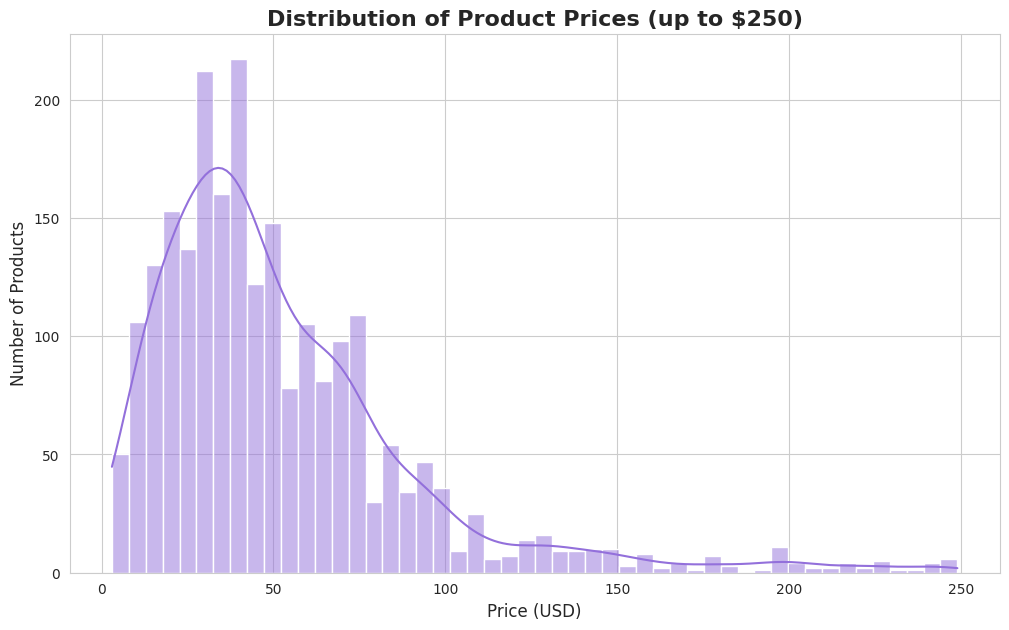

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style and figure size for our charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# --- Product Price Distribution ---
print("--- Chart 4: Product Price Distribution ---")

# We'll use the original dataframe but drop duplicates by product_id to count each product once.
# Also, remove any products with missing price information.
product_prices = df_original.dropna(subset=['price_usd_x']).drop_duplicates(subset=['product_id'])

# To make the visualization clearer, we'll filter out extreme outliers (e.g., prices > $250)
filtered_prices = product_prices[product_prices['price_usd_x'] <= 250]

plt.figure()
# Plot a histogram with a KDE overlay
sns.histplot(filtered_prices['price_usd_x'], kde=True, color="mediumpurple", bins=50)

plt.title('Distribution of Product Prices (up to $250)', fontsize=16, weight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.show()

### **6.5 Rating Distribution by Price Range**

--- Chart 5: Rating Distribution by Price Range ---


/tmp/ipython-input-1164086185.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_products['price_bin'] = pd.cut(filtered_products['price_usd_x'], bins=bins, labels=labels, right=False)
/tmp/ipython-input-1164086185.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_bin', y='rating_x', data=filtered_products, palette='coolwarm')


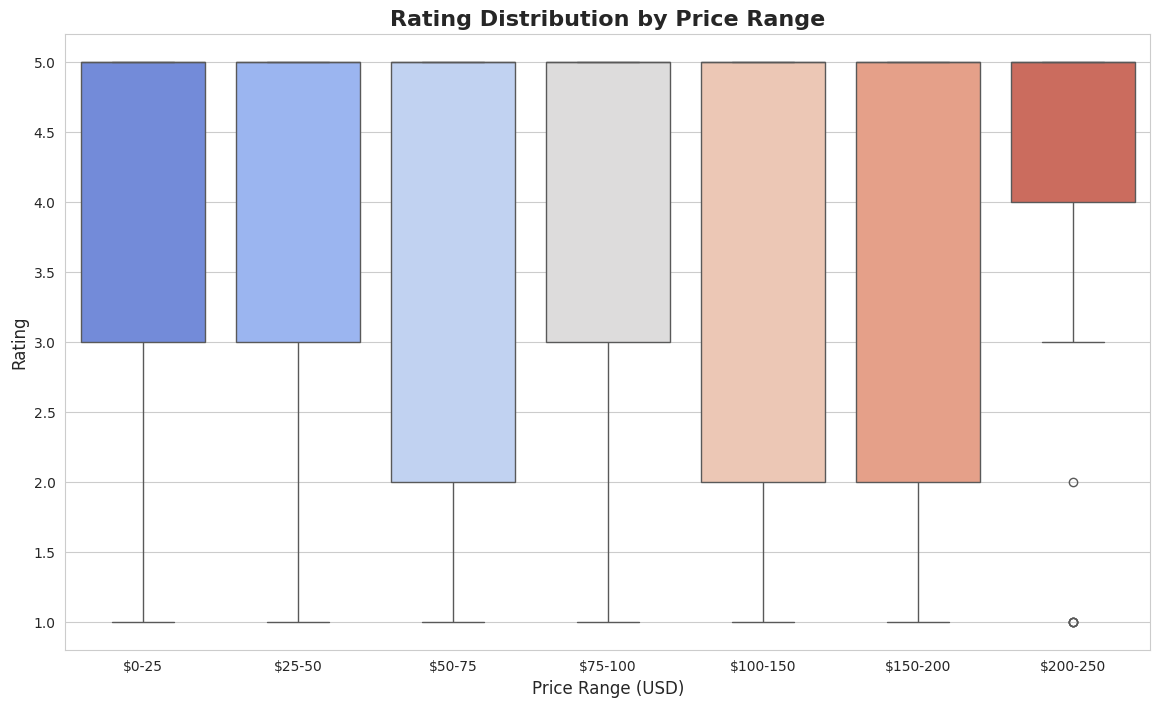

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style and figure size for our charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# --- Rating Distribution by Price Range ---
print("--- Chart 5: Rating Distribution by Price Range ---")

# We'll use the unique product prices from the previous step
product_prices = df_original.dropna(subset=['price_usd_x']).drop_duplicates(subset=['product_id'])

# Filter out extreme outliers for a clearer plot
filtered_products = product_prices[product_prices['price_usd_x'] <= 250]

# --- Create Price Bins ---
# We use pd.cut to segment the products into price ranges
bins = [0, 25, 50, 75, 100, 150, 200, 250]
labels = ['$0-25', '$25-50', '$50-75', '$75-100', '$100-150', '$150-200', '$200-250']
filtered_products['price_bin'] = pd.cut(filtered_products['price_usd_x'], bins=bins, labels=labels, right=False)

# --- Create the Box Plot ---
plt.figure()
sns.boxplot(x='price_bin', y='rating_x', data=filtered_products, palette='coolwarm')

plt.title('Rating Distribution by Price Range', fontsize=16, weight='bold')
plt.xlabel('Price Range (USD)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

### **6.6 Sentiment by Product Category**
This analysis pinpoints which product categories are the biggest drivers of customer happiness or frustration.

--- Chart 7: Brand Deep-Dive Word Clouds ---


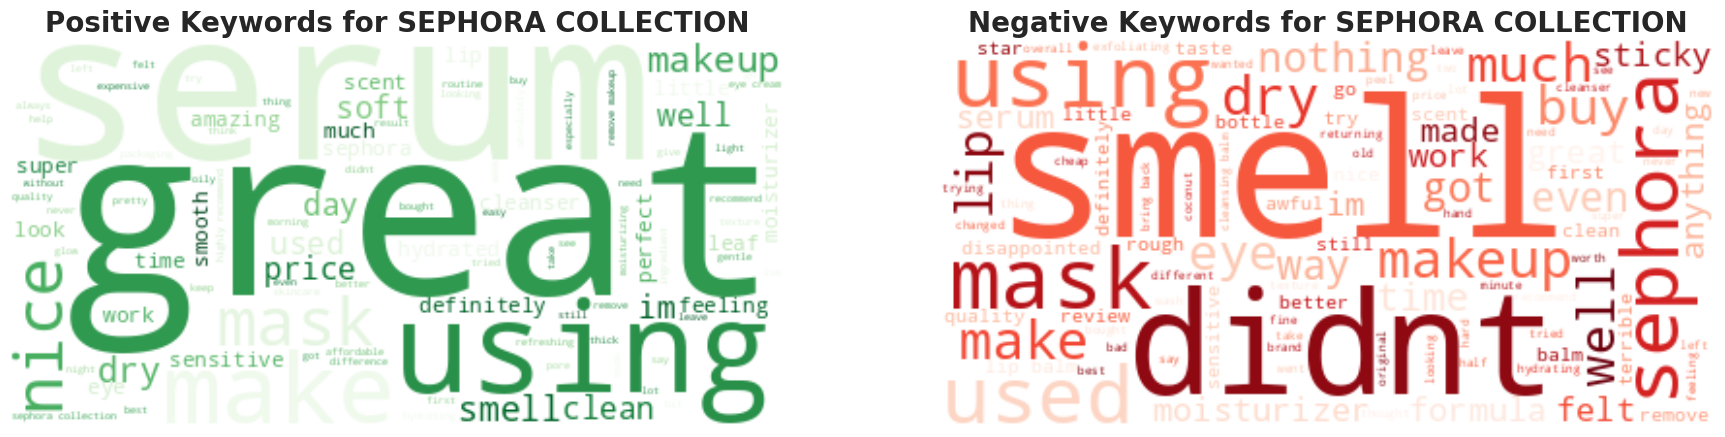

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Set a visually appealing style and figure size for our charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 10)

# --- Brand Deep-Dive ---
print("--- Chart 7: Brand Deep-Dive Word Clouds ---")

# !!! CHOOSE A BRAND TO ANALYZE !!!
brand_to_analyze = 'SEPHORA COLLECTION'

# Filter the sample dataframe for only this brand's reviews
brand_df = df_sample[df_sample['brand_name_x'] == brand_to_analyze]

# Separate the cleaned text for the brand's positive and negative reviews
positive_reviews_brand = " ".join(review for review in brand_df[brand_df['sentiment'] == 1]['cleaned_review'])
negative_reviews_brand = " ".join(review for review in brand_df[brand_df['sentiment'] == 0]['cleaned_review'])

# --- Define custom stopwords ---
custom_stopwords = set(STOPWORDS)
# Add domain-specific generic words
custom_stopwords.update(["product", "feel", "use", "love", "skin", "face", "like", "one", "get", "good", "great" "using", "really", "wipe", "dont", "doesnt"])

# Create word clouds with custom stopwords
wordcloud_pos = WordCloud(
    background_color="white",
    colormap="Greens",
    max_words=100,
    contour_width=3,
    contour_color='forestgreen',
    stopwords=custom_stopwords
).generate(positive_reviews_brand)

wordcloud_neg = WordCloud(
    background_color="white",
    colormap="Reds",
    max_words=100,
    contour_width=3,
    contour_color='firebrick',
    stopwords=custom_stopwords
).generate(negative_reviews_brand)

# Plot them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

ax1.imshow(wordcloud_pos, interpolation='bilinear')
ax1.set_title(f'Positive Keywords for {brand_to_analyze}', fontsize=20, weight='bold')
ax1.axis("off")

ax2.imshow(wordcloud_neg, interpolation='bilinear')
ax2.set_title(f'Negative Keywords for {brand_to_analyze}', fontsize=20, weight='bold')
ax2.axis("off")

plt.show()
